## Imports

In [1]:

import pandas as pd
import plotly.express as px
import calendar
from datetime import datetime
from datetime import timedelta
from cronsim import CronSim
import argparse
import json
import PySimpleGUI as sg
#import PySimpleGUIWeb as sg
import pathlib
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import textwrap
import re
import webbrowser
import subprocess
import collections
import pyglet,tkinter
from pyglet import font
# import OpenGL
# from OpenGL import GLU
font.add_file('/etc/fonts/fonts/CENTAUR.TTF')
font='Courier 10 bold '

## Crons

In [2]:
crons = []
def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return
        yield start
        start += len(sub) # use start += 1 to find overlapping matches
with open("/home/joe/bic_etl/general/cron/cron_file","r") as fin:
    for line in fin:
        if line[0:1] != "#"  and len(line) > 5:
           #print(line0)
#           print(line)
           crons.append(line.rstrip())
        line0=line
print(f"{len(crons)} Cron Jobs Found")

crons_all = []
ncrons=0
for line in crons:
    line = line.strip(" ")
    spl = line.split(" ")
    crn=""
    print(line)
    mm = line.find("node")
    nj = line.find("java")
    npyth = line.find("python")
    nt = line.find("-t")
    np = line.find("-p")
    if (np > 0):
        a = list(find_all(line[np:],'\"'))
        # if len(a) > 0:
        #   p=line[np+a[0]:np+a[1]+1]
        # else:
        ss = line[np:].split()
        p=ss[1]
    elif mm > 0:
        pp = spl[6].split("/")
        p= pp[-1]
        
    elif nj > 0:  # java line
        pp = spl[7].split("/")
        p= pp[-1]
       
    elif npyth > 0:  # java line
        pp = spl[10].split("/")
        p= pp[-1]
       
    else:
            p=""
        
    if (nt > 0):
        ngt = line.find(">>")
        a = list(find_all(line[nt:ngt],'\"'))
        if len(a) > 0:
          t=line[nt+a[0]:nt+a[1]+1]
        else:
          ss = line[nt:].split()
          t=ss[1]
    else:
        t=""
            

    for val in spl[:5]:
        crn+= f"{val} "
    crn = crn.rstrip()
    if spl[5] == "node":
        pg = spl[6]
    else:
        pg=""
    if len(p) > 0:  #  There is a program listed
      
        pgs=pg.split("/")
       
    #    print(line)
        mo = 1
        
        try:
            it = CronSim(crn,datetime.strptime("2023-01-01","%Y-%m-%d"))
            a = next(it) 
        
            while  a.month == mo:
          #      print(a.month,a.day,a.hour,a.minute,a.hour+a.minute/60)
          #      print(f"start:{a}   end:{a+timedelta(days=1)}")
                d = dict(Day=calendar.day_name[a.weekday()],Cron=line,T=t,TM=f"{a.hour}:{a.minute}",Task=p,Details=t,Program=pg,Start=a,End=a+timedelta(days=1),Time=a.hour+a.minute/60,Color=li[ncrons])
                crons_all.append(d)
            # print(f"pg: {pg} P:{p} T:{t}")    
                a = next(it)
            ncrons+=1 
        except:
            print("Count not Process",crn)
            print(line)
    else:  # Not a node runnning a cim dataset... must be java or python
        print(line)
    #  print("--------")

print(f"{len(crons_all)}  Crons successfully mapped to time ranges")

30 Cron Jobs Found
50 2 * * * node /usr/local/cim/bic_etl/general/scripts/pull_and_setup.js 2>> $bic_etl_home/general/logs/cron.log
Count not Process 50 2 * * *
50 2 * * * node /usr/local/cim/bic_etl/general/scripts/pull_and_setup.js 2>> $bic_etl_home/general/logs/cron.log
58 2 * * * /usr/bin/java -jar /usr/local/cim/bic_etl/general/datasync/DataSync-1.8.2.jar -t LoadPreferences -c /usr/local/cim/bic_etl/general/datasync/config.json 2>> $bic_etl_home/general/logs/cron.log
Count not Process 58 2 * * *
58 2 * * * /usr/bin/java -jar /usr/local/cim/bic_etl/general/datasync/DataSync-1.8.2.jar -t LoadPreferences -c /usr/local/cim/bic_etl/general/datasync/config.json 2>> $bic_etl_home/general/logs/cron.log
0 5 * * * PATH=$PATH:/home/giddensm/.local/bin PIPENV_PIPFILE=/usr/local/cim/bic_etl/general/metadata_updater/scripts/Pipfile pipenv run python /usr/local/cim/bic_etl/general/metadata_updater/scripts/metadata_updater.py -a 2>> $bic_etl_home/general/logs/cron.log
Count not Process 0 5 * * *


In [16]:
def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return
        yield start
        start += len(sub) # use start += 1 to find overlapping matches
s='''
    aliceblue, antiquewhite, aqua, aquamarine, azure,
    beige, bisque, black, blanchedalmond, blue,
    blueviolet, brown, burlywood, cadetblue,
    chartreuse, chocolate, coral, cornflowerblue,
    cornsilk, crimson, cyan, darkblue, darkcyan,
    darkgoldenrod, darkgray, darkgrey, darkgreen,
    darkkhaki, darkmagenta, darkolivegreen, darkorange,
    darkorchid, darkred, darksalmon, darkseagreen,
    darkslateblue, darkslategray, darkslategrey,
    darkturquoise, darkviolet, deeppink, deepskyblue,
    dimgray, dimgrey, dodgerblue, firebrick,
    floralwhite, forestgreen, fuchsia, gainsboro,
    ghostwhite, gold, goldenrod, gray, grey, green,
    greenyellow, honeydew, hotpink, indianred, indigo,
    ivory, khaki, lavender, lavenderblush, lawngreen,
    lemonchiffon, lightblue, lightcoral, lightcyan,
    lightgoldenrodyellow, lightgray, lightgrey,
    lightgreen, lightpink, lightsalmon, lightseagreen,
    lightskyblue, lightslategray, lightslategrey,
    lightsteelblue, lightyellow, lime, limegreen,
    linen, magenta, maroon, mediumaquamarine,
    mediumblue, mediumorchid, mediumpurple,
    mediumseagreen, mediumslateblue, mediumspringgreen,
    mediumturquoise, mediumvioletred, midnightblue,
    mintcream, mistyrose, moccasin, navajowhite, navy,
    oldlace, olive, olivedrab, orange, orangered,
    orchid, palegoldenrod, palegreen, paleturquoise,
    palevioletred, papayawhip, peachpuff, peru, pink,
    plum, powderblue, purple, red, rosybrown,
    royalblue, saddlebrown, salmon, sandybrown,
    seagreen, seashell, sienna, silver, skyblue,
    slateblue, slategray, slategrey, snow, springgreen,
    steelblue, tan, teal, thistle, tomato, turquoise,
    violet, wheat, white, whitesmoke, yellow,
    yellowgreen
    '''
li=s.split(',')
li=[l.replace('\n','') for l in li]
li=[l.replace(' ','') for l in li]

In [18]:
# parser = argparse.ArgumentParser(description='Argparse Test script')
# parser.add_argument('-p', help='program')
# parser.add_argument('-t', help='sub program')
# parser.add_argument('2', help='??')

crons_all = []
ncrons=0
for line in crons:
    line = line.strip(" ")
    spl = line.split(" ")
    crn=""
#    print(line)
    mm = line.find("node")
    nj = line.find("java")
    npyth = line.find("python")
    nt = line.find("-t")
    np = line.find("-p")
    if (np > 0):
        a = list(find_all(line[np:],'\"'))
        # if len(a) > 0:
        #   p=line[np+a[0]:np+a[1]+1]
        # else:
        ss = line[np:].split()
        p=ss[1]
    elif mm > 0:
        pp = spl[6].split("/")
        p= pp[-1]
        print("P ",p)
    elif nj > 0:  # java line
        pp = spl[7].split("/")
        p= pp[-1]
        print("P ",p)
    elif npyth > 0:  # java line
        pp = spl[10].split("/")
        p= pp[-1]
        print("P ",p)
    else:
            p=""
        
    if (nt > 0):
        ngt = line.find(">>")
        a = list(find_all(line[nt:ngt],'\"'))
        if len(a) > 0:
          t=line[nt+a[0]:nt+a[1]+1]
        else:
          ss = line[nt:].split()
          t=ss[1]
    else:
        t=""
            
    
    for val in spl[:5]:
        crn+= f"{val} "
    crn = crn.rstrip()
    if spl[5] == "node":
        pg = spl[6]
    else:
        pg=""
    if len(p) > 0:  #  There is a program listed
      
        pgs=pg.split("/")
       
    #    print(line)
        mo = 1
        
        try:
            it = CronSim(crn,datetime.strptime("2023-01-01","%Y-%m-%d"))
            a = next(it) 
            
            while  a.month == mo:
           #     print("TIME TIME TIME TIME ",a.month,a.day,a.hour,a.minute,a.hour+a.minute/60)
          #      print(f"start:{a}   end:{a+timedelta(days=1)}")
             
                d = dict(Day=calendar.day_name[a.weekday()],Cron=line,T=t,TM=f"{a.hour}:{a.minute}",Task=p,Details=t,Program=pg,Start=a,End=a+timedelta(days=1),Time=a.hour+a.minute/60,Color=li[ncrons])
                crons_all.append(d)
              
            # print(f"pg: {pg} P:{p} T:{t}")    
                a = next(it)
            ncrons+=1 
        except:
            print("Count not Process",crn)
            print(line)
    else:  # Not a node runnning a cim dataset... must be java or python
        print(line)
    #  print("--------")

print(f"{len(crons_all)}  Crons successfully mapped to time ranges")

### Plot crons

P  pull_and_setup.js
P  DataSync-1.8.2.jar
P  metadata_updater.py
P  cleanup.js
402  Crons successfully mapped to time ranges


In [22]:
df = pd.DataFrame(crons_all)

In [41]:
df.head(10)

,Day,Cron,T,TM,Task,Details,Program,Start,End,Time,Color
0,Sunday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-01 02:50:00,2023-01-02 02:50:00,2.833333,aliceblue
1,Monday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-02 02:50:00,2023-01-03 02:50:00,2.833333,aliceblue
2,Tuesday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-03 02:50:00,2023-01-04 02:50:00,2.833333,aliceblue
3,Wednesday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-04 02:50:00,2023-01-05 02:50:00,2.833333,aliceblue
4,Thursday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-05 02:50:00,2023-01-06 02:50:00,2.833333,aliceblue
5,Friday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-06 02:50:00,2023-01-07 02:50:00,2.833333,aliceblue
6,Saturday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-07 02:50:00,2023-01-08 02:50:00,2.833333,aliceblue
7,Sunday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-08 02:50:00,2023-01-09 02:50:00,2.833333,aliceblue
8,Monday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-09 02:50:00,2023-01-10 02:50:00,2.833333,aliceblue
9,Tuesday,50 2 * * * node /usr/local/cim/bic_etl/general...,,2:50,pull_and_setup.js,,/usr/local/cim/bic_etl/general/scripts/pull_an...,2023-01-10 02:50:00,2023-01-11 02:50:00,2.833333,aliceblue


In [29]:
df.columns

Index(['Day', 'Cron', 'T', 'TM', 'Task', 'Details', 'Program', 'Start', 'End',
       'Time', 'Color'],
      dtype='object')

/home/joe/.local/share/virtualenvs/fileBrowser-GJ-mJl-Y/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/joe/.local/share/virtualenvs/fileBrowser-GJ-mJl-Y/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/joe/.local/share/virtualenvs/fileBrowser-GJ-mJl-Y/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

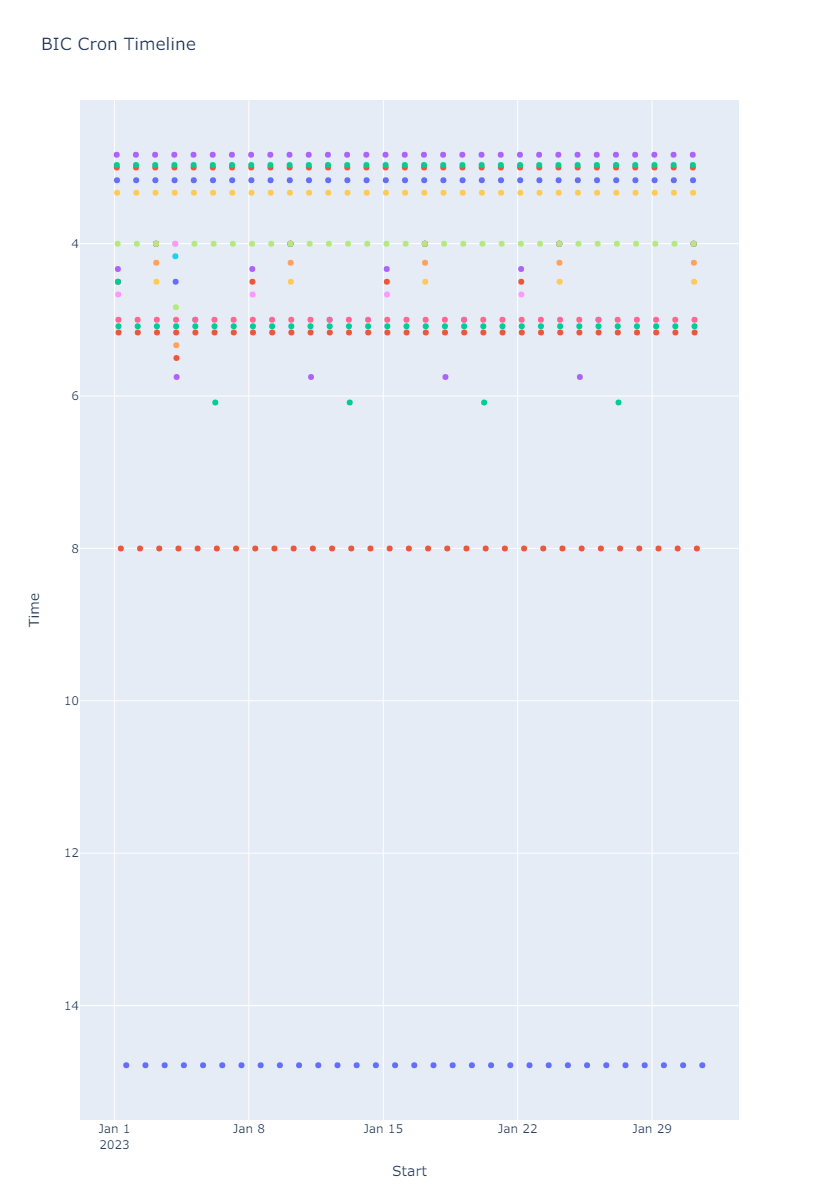

In [43]:

def plotCrons(crons):
    df = pd.DataFrame(crons)
    df.sort_values(by="Time",inplace=True,ascending=False)
#    display(df.head())
#    fig = px.timeline(df,title="BIC Cron Timeline", x_start="Start", x_end="End", y="Task",height=600,width=1200,hover_data=["Task","Day","TM","T","Cron"],color="Task")
#    fig = px.scatter_3d(df,title="BIC Cron Timeline", x="Start", y="Task",z="Time",height=900,width=1200,hover_data=["Task","Day","TM","T","Cron"],color="Task")
    fig = px.scatter(df,title="BIC Cron Timeline", x="Start", y="Time",height=1200,width=1200,hover_data=["Task","Day","TM","T","Cron"],color="Task")

    fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
    fig.update_layout(showlegend=False)
    # f2 = fig.full_figure_for_development(warn=False)
    # f2.layout.barmode = 'overlay'
    fig.show()
    
plotCrons(crons_all)

In [38]:
dfc =  df.copy()

In [45]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Iris samples filtered by petal width'),
    dcc.Graph(id="graph"),
    html.P("Petal Width:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=24, step=0.1,
        marks={0: '0', 24: '24'},
        value=[0, 24]
    ),
])
#    fig = px.scatter_3d(df,title="BIC Cron Timeline", x="Start", y="Task",z="Time",height=900,width=1200,hover_data=["Task","Day","TM","T","Cron"],color="Task")

@app.callback(
    Output("graph", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = dfc # replace with your own data source
    low, high = slider_range
    mask = (df["Time"] > low) & (df["Time"] < high)

#     fig = px.scatter_3d(df[mask], 
#         x='Start', y='Task', z='Time',
#         color="Task", hover_data=['Time'])
    
    fig = px.scatter(df[mask], 
        x='Start', y='Time', 
        color="Task", hover_data=['Time'])
    return fig

app.run_server(debug=True)

/home/joe/.local/share/virtualenvs/fileBrowser-GJ-mJl-Y/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/joe/.local/share/virtualenvs/fileBrowser-GJ-mJl-Y/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/joe/.local/share/virtualenvs/fileBrowser-GJ-mJl-Y/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

SystemExit: 

/home/joe/.local/share/virtualenvs/fileBrowser-GJ-mJl-Y/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3534: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



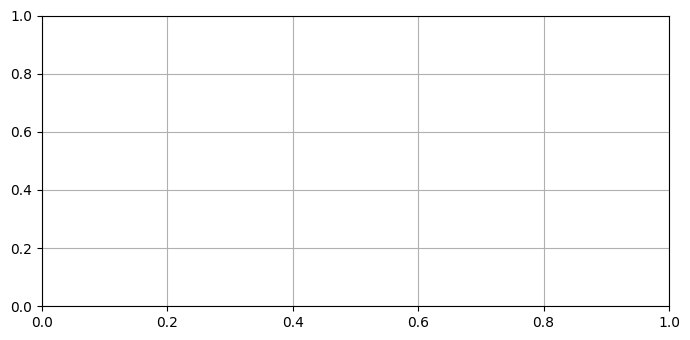

In [47]:
import PySimpleGUI as sg
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from numpy.random import rand

def draw_figure(canvas, figure):
    figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
    return figure_canvas_agg

def main():
    # define the form layout
    layout = [[sg.Text('Animated Matplotlib', size=(40, 1), justification='center', font='Helvetica 20')],
              [sg.Canvas(size=(640, 480), key='-CANVAS-')],
              [sg.Button('Exit', size=(10, 2), pad=((280, 0), 3), font='Helvetica 14')]]

    # create the form and show it without the plot
    window = sg.Window('Demo Application - Embedding Matplotlib In PySimpleGUI', layout, finalize=True)

    canvas_elem = window['-CANVAS-']
    canvas = canvas_elem.TKCanvas
    # draw the intitial scatter plot
    fig, ax = plt.subplots()
    ax.grid(True)
    fig_agg = draw_figure(canvas, fig)

    while True:
        event, values = window.read(timeout=10)
        if event in ('Exit', None):
            exit(69)

        # ax.cla()
        # ax.grid(True)
        # for color in ['red', 'green', 'blue']:
        #     n = 750
        #     x, y = rand(2, n)
        #     scale = 200.0 * rand(n)
        #     ax.scatter(x, y, c=color, s=scale, label=color, alpha=0.3, edgecolors='none')
        # ax.legend()
        # fig_agg.draw()
    window.close()


if __name__ == '__main__':
    main()

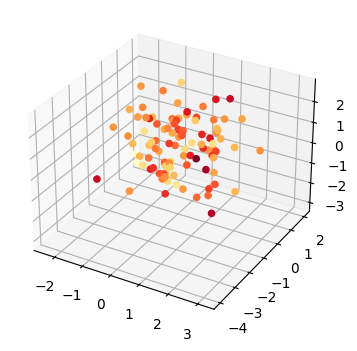

In [20]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
c = np.random.standard_normal(100)
img = ax.scatter(x, y, z, c=c, cmap='YlOrRd', alpha=1)
plt.show()

## Cron Dataset Info

In [15]:
def splitL(data):
    if data:
        head, *tail = data  # This is a nicer way of doing head, tail = data[0], data[1:]
        return {head: splitL(tail)}
    else:
        return []

groups = []
desktop = pathlib.Path("/home/joe/bic_etl")
runEtls = []
dataSets = []
# .rglob() produces a generator too
desktop.rglob("*")
files = list(desktop.rglob("*"))
# Which you can wrap in a list() constructor to materialize
for ff in files:
    # if ff.find("run_etl.json") >  0:
     
        if (str(ff).split("/")[-1] == "run_etl.json"):     
            a=str(ff).split("/")
            m = a.index("bic_etl")
  #          print(ff)
            b = a[m+1:-1]
            ll = splitL(b)
            groups.append(ll)
            runEtls.append(ff)
            
print(f"{len(runEtls)} run_etl.json files found")

26 run_etl.json files found


### Back to work

In [16]:
def go_deeper(aDict,value,nit):
    nit+=1
    for k, v in aDict.items():
         if not bool(v):            
             aDict[k] = []
             aDict[k].append(value)
         elif isinstance(v,list):
             aDict[k].append(value)
         else:
             go_deeper(v,value,nit)
   
    return aDict


dataSets = []
groups = []
for file in runEtls:
  f = open(file,"r")
  data = json.load(f)
  # print(file)
  # print("----")
  a=str(file).split("/")
  m = a.index("bic_etl")
  b = a[m+1:-1]
  ll = splitL(b)
#  print(ll)
#  groups.append(ll)
  for val in data:
        if "title" in val:
              title=val["title"]
#              print(title,ll)
              nit=0
              ll = go_deeper(ll,title,nit)
 #             print(ll)
 #             groups.append(ll)
        dataSets.append(val)
#  print("FF ",ll) 
  groups.append(ll)

datasets = []
dataSetsEtl={}
for val in dataSets:
    if "title" in val:
      datasets.append(val["title"])
      title=val["title"]
      dataSetsEtl[title] = {}  
      for k,v in val.items():
      #      print(k,v)
            if k != "title":
                dataSetsEtl[title][k] = {}
                if isinstance(v,dict):
                    for k1,v1 in v.items():
                        dataSetsEtl[title][k][k1]=v1
                        
datasets = sorted(datasets)

In [18]:
def go_deeper3(aDict,aKeys):
    global lst
    for k, v in aDict.items():
         if isinstance(v,list):     
             aKeys.append(k)
             break
         else:
             aKeys.append(k)
             go_deeper3(v,aKeys)
    if isinstance(v,list):
        lst=v
    return aKeys



def dict_merge(dct, merge_dct):
    """ Recursive dict merge. Inspired by :meth:``dict.update()``, instead of
    updating only top-level keys, dict_merge recurses down into dicts nested
    to an arbitrary depth, updating keys. The ``merge_dct`` is merged into
    ``dct``.
    :param dct: dict onto which the merge is executed
    :param merge_dct: dct merged into dct
    :return: None
    """
    for k, v in merge_dct.items():
    #    print(k,v)
        if (k in dct and isinstance(dct[k], dict) and isinstance(merge_dct[k], dict)):  #noqa
            dict_merge(dct[k], merge_dct[k])
        else:
            dct[k] = merge_dct[k]

groupSummary = {}
for dd in groups:
    kys=[]
    lst=[]
    nit=0
#    kys = go_deeper3(dd,kys)
#    print(kys,lst)
    dict_merge(groupSummary,dd)
 
      

In [ ]:
def go_d(aDict):
    for kk,vv in aDict.items():
          if isinstance(vv,dict):
                go_d(vv)
   #       print("    ",kk)
          for ds in vv:
                print("        ",ds)
    return kk,vv

for k,v in groupSummary.items():
    print(k)
    if isinstance(v,dict):
      mm,nn =  go_d(v)
  #    print(mm,nn)
   #   print("---")
    else:
        for ds in v:
            print("     ",ds)
                
        

In [12]:
def go_d(aDict):
    for kk,vv in aDict.items():
          if isinstance(vv,dict):
                go_d(vv)
          
          for ds in vv:
                print("        ",ds)
    return kk,vv


def go_d2(aDict):
    for kk,vv in aDict.items():
          if isinstance(vv,dict):
                go_d(vv)
          
          for ds in vv:
                print("        ",ds)
    #return kk,vv


go_d2(groupSummary["cdos"])

         Durable Medical Equipment Suppliers in Colorado
         Current Notaries in Colorado
         Uniform Commercial Code (UCC) Collateral Information in Colorado
         Uniform Commercial Code (UCC) Debtor Information in Colorado
         Uniform Commercial Code (UCC) Filing Information in Colorado
         Secured Party Information in Colorado
         Business Entities in Colorado
         Business Entity Transaction History
         Trademarks for Businesses in Colorado
         Trade Names for Businesses in Colorado
         Master List in Colorado
         Federal Tax-Exempt Subsection Codes in Colorado
         Registration for Charities, Paid Solicitors, Professional Fundraising Consultants, and for-profit Public Benefit Corporations in Colorado
         Charitable Organizations’ Offices in Colorado
         Other State Solicitation of Charities’ Registrants in Colorado
         Charitable Purpose of the Charity in Colorado
         Paid Solicitor Solicitation Notices i

## All CIM Datasets

In [21]:
#mf = pd.read_excel("BICDataInventoryandMetadata.xlsx",skiprows=2,sheet_name="Maintenance_Framework",engine="openpyxl")
mf = pd.read_excel("BICDataInventoryandMetadata.xlsx",skiprows=0,sheet_name="Inventory_Active",engine="openpyxl")

In [22]:

def map4x4(row):
    
    if isinstance(row["Data Link"],str) and  len(row["Data Link"]) == 9 and re.findall( "\w{4}-\w{4}",row["Data Link"]):
  #      link = '<a href="https://data.colorado.gov/dataset/{}">{}</a>'.format(row["Data Link"],row["Data Link"])
        
        link = 'https://data.colorado.gov/dataset/{}'.format(row["Data Link"])
    else:
        link = ""
        
    return link
    
mf["CIM Link"] = mf.apply(map4x4,axis=1)

## GUI

In [23]:
mf=mf.loc[~mf["Standardized Title for Dataset"].isna()]
mfShort = mf[['Standardized Title for Dataset', 'Data Link','CIM Data Type','GoCodePublishYear','Standardized Short Description','CIM Link']]
mfShort["Standardized Title for Dataset"] = mfShort["Standardized Title for Dataset"].astype(str)

/tmp/ipykernel_662/2381733548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfShort["Standardized Title for Dataset"] = mfShort["Standardized Title for Dataset"].astype(str)


### GUI Groups

In [24]:
def go_d2(aDict):
    global string
    for kk,vv in aDict.items():
          if isinstance(vv,dict):
                go_d(vv)
  #        print("    ",kk)
          string+=f"{kk}\n"
          for ds in vv:
  #              print("        ",ds)
                string+=f"    {ds}"
    #return kk,vv

string=""
#go_d2(groupSummary["cdos"])
#print(string)

def groupGUI():
    buttons = []
    buttons.append(sg.Button("cdos"))
    buttons.append(sg.Button("cdot"))
    buttons.append(sg.Button("dola"))
    layout = [
             [sg.Text("BIC ETL Groups")],
             [sg.Button('Quit')],
              [buttons],          
              [sg.Multiline(default_text="ETL Group Summary",key="-ETL-",size=[70,20])]

       ]
    # Create the Window
    sg.theme('Dark Green 5')
    window3 = sg.Window('ETL', layout,finalize=True,resizable=True)
    #window = sg.Window('Window Title', layout, web_port=2222, web_start_browser=False)
    #table = window2['-TABLE2-']

    #window2.move(window.current_location()[0]+600, window.current_location()[1])
    try: 
        while True:

            event, values = window3.read()
            print('event: ',event, 'values: ',values)
            if event == sg.WIN_CLOSED or event == 'Quit':
                window3.close()
                break
    except  Exception as e: print(e)
groupGUI()

event:  Quit values:  {'-ETL-': 'ETL Group Summary'}


### GUI Cron Window

In [48]:
def wrap(string, lenght=60):
    if isinstance(string,str):
       return '\n'.join(textwrap.wrap(string, lenght))
    else:
        return ""
def runETL(k):
    global extract,a,string
    text2 = ""
    print(k)
## Build Summary Text string
    for ky1 in dataSetsEtl[k].keys():
        text2+=f"{ky1}:\n" 
        for k2,v2 in dataSetsEtl[k][ky1].items(): 
            sl = 10 - len(k2)
            s = " "*sl
        
            if isinstance(v2,list) == False:
                text2+=f"    {k2:10s}{s} :  {v2}\n"
            else:
                text2+=f"    {k2:10s}{s} : {v2[0]}\n"
                if len(v2) > 1:
                    for val in v2[1:]:
                        text2+= f"                   {s} : {val}\n"

        text2+=f"\n\n"
## Build actions
    extract = ""
    if 'extract' in dataSetsEtl[ds]:
        if (dataSetsEtl[ds]['extract']['language'] == 'node'):
            pgm =  dataSetsEtl[ds]['extract']['file']
            options=""
            if 'options' in dataSetsEtl[ds]['extract']:

                for opts in dataSetsEtl[ds]['extract']['options']:
                    options+= f" {opts}" 
            extract = f"node /home/joe/bic_etl/{pgm} {options}"
            print(string)
    text2+=f"\n\nActions Strings\nExtract\n{extract}"
        
    return text2,extract
    
    
def cronGUI():
    global ds,text2,a,string
    header_list = list(mfShort.columns)
    # mfV = []
    # a = ["","",nan,nan,""]
    # mfV.append(a)
    layout = [
             [sg.Text("BIC Cron DataSets")],
             [sg.Combo(datasets,enable_events=True,key="-DATASET-",font='Courier 10 bold ')],
              [sg.Button('Quit'),sg.Button("Plot Crons")],
              [sg.Button("Extract",font='Courier 10 bold ',key="-EXTRACT-",visible=False)],
              [sg.Button('Go to CIM Dataset',visible=False,key="-LINK-",metadata="")],
              [sg.Text(text="Dataset Summary",enable_events=True,font='Courier 15 bold ',background_color="blue",key="-OUTPUT-",size=[70,10]),
       #       [sg.Multiline(default_text="Dataset Summary",key="-OUTPUT-",size=[70,10]),

               sg.Multiline(default_text="ETL Summary",key="-ETL-",size=[70,20],font='Courier 15 bold ')
              ]

       ]
    # Create the Window
    sg.theme('Dark Green 5')
    window2 = sg.Window('ETL', layout,finalize=True,resizable=True)
    #window = sg.Window('Window Title', layout, web_port=2222, web_start_browser=False)
    #table = window2['-TABLE2-']

    #window2.move(window.current_location()[0]+600, window.current_location()[1])
    try: 
        while True:

            event, values = window2.read()
            print('event: ',event, 'values: ',values)
 #           print("W2",event,values)
        #    window, event, values = sg.read_all_windows()
            if event == sg.WIN_CLOSED or event == 'Quit':
                window2.close()
        #        sys.exit(1)
                what = "QUIT"
                break
            elif event == "-DATASET-":

                (ds)  = list(values.items())
                ds=ds[0][1]
                mmf = mfShort.loc[mfShort["Standardized Title for Dataset"].str.strip() == ds.strip()]
                if mmf.shape[0] > 0:
                #            mmf["Standardized Short Description"] = mmf["Standardized Short Description"].map(wrap)          
                    text = f"Title             : {mmf['Standardized Title for Dataset'].values.tolist()[0]}\nSocrata        : {mmf['Data Link'].values.tolist()[0]}\nData Type    : {mmf['CIM Data Type'].values.tolist()[0]}\nPublish Year: {mmf['GoCodePublishYear'].values.tolist()[0]}\nCIM Link : {mmf['CIM Link'].values.tolist()[0]}\nDescription  : {mmf['Standardized Short Description'].values.tolist()[0]}"            
                    display(mmf)
                else:
                    text = "None"
                if ds in dataSetsEtl:
                      text2,extract = runETL(ds)
                else:
                      text2=""
                      extract = ""
                if len(extract) > 10:
                    window2["-EXTRACT-"].update(visible=True)
                print("T2",text2)
                window2["-OUTPUT-"].update(text)
                window2["-ETL-"].update(text2)
                link =  mmf['CIM Link'].values.tolist()[0]
                print("Link ",mmf['CIM Link'],link.find("http"))
                
                if link.find("http") > -1:
                     window2["-LINK-"].update (visible=True)
                else:
                     window2["-LINK-"].update (visible=False)
               
            elif event == "-LINK-":
                    print("Going To: ",link) 
                    if len(link) > 10:
                        webbrowser.open(link)
            elif event == "Plot Crons":    
                plotCrons(crons_all)
                
            elif event == "-EXTRACT-":
                a=subprocess.run(extract,shell=True,capture_output=True,text=True)
                string= "\n\n-------------------------------------\n"
                string+= "Extract Output\n"
                if len(a.stderr) > 0:
                    string+= "fError:\n {a.stderr}"
                string+=f"STDOUT: {a.stdout}"
                window2["-ETL-"].update(string,append=True)
             #   sg.popup(string)
                
    except  Exception as e: print(e)
    
cronGUI()

event:  Quit values:  {'-DATASET-': '', '-ETL-': 'ETL Summary'}


In [47]:
sx = string.find("successfully download to")
string[sx+25:]
sxo = string[sx+25:].find("!")
print(sxo)
file=f"/home/joe/bic_etl{string[sx+25:sx+25+sxo]}"
print(file)


37
/home/joe/bic_etl/cdos/lobbyist/data_source/Income.tsv


### GUI MAIN Window

In [ ]:
def getVals(df,cim):
    if cim == "CIM":
                mfs = df.loc[(df["Data Link"].str.lower() != "not on cim") & (~df["Data Link"].isna())]
    elif cim == "NOT":
                mfs = df.loc[(df["Data Link"].str.lower() == "not on cim") | (df["Data Link"].isna())]
    elif cim == "BOTH":
                mfs = df
    
    return mfs


r11 = sg.Radio("CIM", "gen", key='CIM',enable_events = True)
r12 = sg.Radio("Not CIM", "gen", key='NOT',enable_events = True)
r13 = sg.Radio("Both", "gen", key='BOTH',enable_events = True,default=True)
filt="BOTH"
l1 = sg.Text("Availability")


header_list = list(mfShort.columns)
mfValues = mfShort.values.tolist()
layout = [
         [sg.Text("CIM Datasets")],
         [sg.Button('Quit')],
        [sg.Button("ETL/Crons")],
         [l1,r11,r12,r13],
         [sg.Text("Search: "),sg.Multiline("",key="-SEARCH-"),sg.Button('Go')],
          [sg.Table(values=mfValues, max_col_width=10,size=[400,500],
               background_color='green',
               auto_size_columns=True,enable_events=True,
               justification='center',alternating_row_color='brown',
               key='-TABLE-', headings = header_list,vertical_scroll_only = False)]
   ]
# Create the Window
sg.theme('Dark Green 5')
window = sg.Window('Output', layout,finalize=True,resizable=True,size=[800,500])


#window2.move(window.current_location()[0]+600, window.current_location()[1])
table = window['-TABLE-']
table.bind('<Button-1>', "Click")
titleSort=1
while True:
  
    event, values = window.read()
#    print(event,values)
#    window, event, values = sg.read_all_windows()
    if event == sg.WIN_CLOSED or event == 'Quit':
        window.close()
#        sys.exit(1)
        what = "QUIT"
        break
    elif event in ["CIM","BOTH","NOT"]:
        mfs = getVals(mfShort,event)
        filt=event
        values=mfs.values.tolist()
        window['-TABLE-'].update(values=values)
    elif event == '-TABLE-Click':
        e = table.user_bind_event
        region = table.Widget.identify('region', e.x, e.y)
        if region == "heading":
            column = int(table.Widget.identify_column(e.x)[1:])
        
            if (column == 1):
                titleSort*=-1
                sortAsc=True
                if titleSort == -1:
                    sortAsc=False
                mfs = mfShort.sort_values(by="Standardized Title for Dataset",ascending=sortAsc)
                mfs = getVals(mfs,filt)
                values=mfs.values.tolist()
                window['-TABLE-'].update(values=values)
        elif region == 'separator':
            continue
        else:
            continue
    elif event == "Go":
        mfs = getVals(mfShort,filt)
        mfs = mfs.loc[mfs["Standardized Title for Dataset"].str.lower().str.contains(values["-SEARCH-"].lower())]
        values=mfs.values.tolist()
        window['-TABLE-'].update(values=values)
   #     display(mfs)
    elif event == 'ETL/Crons':
        cronGUI()
        
        

## Word Cloud

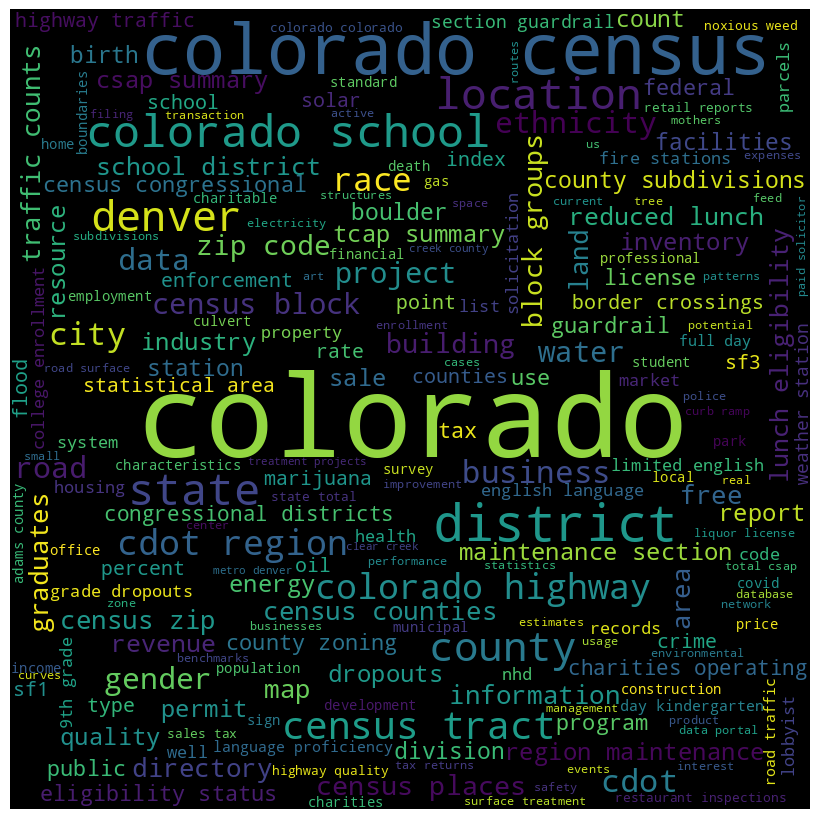

In [19]:
def plotWordCloud(df,col):
    global wordcloud,comment_words
    comment_words = ''
    stopwords = set(STOPWORDS)
    for val in list(df[col].str.lower().values):
        if isinstance(val,str):
            words = val.split()
            comment_words += " ".join(words)+" "
        else:
            print(val)


    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig("wc.png")
    plt.show()
    
plotWordCloud(mfShort,"Standardized Title for Dataset")

In [ ]:
wc = wordcloud.process_text(comment_words)
wc = sorted(wc.items(), key=lambda x:x[1],reverse=True)
wc = wc[1:]

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
flds = pd.read_excel("BICDataInventoryandMetadata.xlsx",skiprows=0,sheet_name="Field Descriptions",engine="openpyxl")

In [ ]:
display(flds.head())

In [ ]:
flds.columns

In [ ]:
flds["Socrata ID"].nunique()

In [ ]:
fldsDict = flds["Full Field Name"].value_counts().to_dict()

In [ ]:
fldsDict

### Testing

In [ ]:
g = {}
for val in groups:
    k = list(val.keys())[0]
    if k in g:
        g[k].append(val[k])
    else:
        g[k] = []
        g[k].append(val[k])

In [ ]:
for k,v in g.items():
    print(k,v)

In [ ]:

def go_deeper2(aDict):
    for k, v in aDict.items():
         if not bool(v):            
             aDict[k] = []
         else:
             go_deeper2(v)
    return aDict

groups2 = []
for ll in groups:
   vv = go_deeper2(ll)
   groups2.append(vv)
   # print(vv.keys())
   # print("----")

In [ ]:
group2

In [ ]:
def merge_dicts(tgt, enhancer):
    for key, val in enhancer.items():
        if key not in tgt:
            tgt[key] = val
            continue

        if isinstance(val, dict):
            merge_dicts(tgt[key], val)
        else:
            tgt[key] = val
    return tgt

tgt = {}

for ll in groups:
tgt2 = merge_dicts(tgt,